<a href="https://colab.research.google.com/github/js-carmona/git_test/blob/master/insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title ## **Access** {display-mode: "form"}
%%capture

import pandas as pd
import polars as pl
import os

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

os.environ['POLARS_FMT_MAX_ROWS'] = '-1'
os.environ['POLARS_FMT_TABLE_HIDE_COLUMN_DATA_TYPES'] = '1'
os.environ['POLARS_FMT_MAX_COLS'] = '-1'
os.environ['POLARS_FMT_TABLE_ROUNDED_CORNERS'] = '1'
os.environ['POLARS_FMT_STR_LEN'] = '-1'
os.environ['POLARS_TABLE_WIDTH'] = '160'

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from google.colab import auth
auth.authenticate_user()

#Replace 'project_id' with your BigQuery project ID
from google.cloud import bigquery
client = bigquery.Client(project='triple-data-playground')

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

import pandas as pd
import numpy as np

import polars as pl
from IPython.display import display

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Use this font for the report
path = '/content/drive/My Drive/Colab Notebooks/Noto_Serif/NotoSerif-Regular.ttf'
fontprop = fm.FontProperties(fname=path)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1WNtYFM-C7vq-zTzi0MIRAxcV1lOfEuwGlVN6COwI-KU/edit?usp=sharing')
sheets = gsheets.worksheet('MCC').get_all_values()
Categories_2 = pd.DataFrame(sheets[:], columns=sheets[0])
Categories_2 = Categories_2.iloc[1:,:]

In [2]:
#@title ## **Select** {display-mode: "form"}
import ipywidgets as widgets
from ipywidgets import HBox, Label
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider
import time
import pandas as pd

#Create DF
df = df = pd.DataFrame(columns = ['Dropdown_column', 'Float_column'])

# Layout
form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between',
)

button_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='center',
    padding = '5%'
)

# Independent dropdown item
drop_down_input = 'Bars and Restaurants'
drop_down = widgets.Dropdown(options=('Bars and Restaurants','Culture','Entertainment','Finance','Groceries','Health & Beauty','Home & Utilities','Other','Professional Services','Public Administrations','Shopping','Software Services','Transport','Travel'))
country = widgets.Dropdown(options=['ES','DE','IT'],value='ES',description='Country:',)
dimension = widgets.Dropdown(options=['Date','YearWeek','YearMonth'],value='YearMonth',description='Dimension:',)

# Dependent drop down
# Dependent drop down elements
dependent_drop_down_elements = {}
dependent_drop_down_elements['Bars and Restaurants'] = ['','Bakeries','Bars and Restaurants','Pubs and Nightclubs','Food delivery']
dependent_drop_down_elements['Culture'] = ['','Education','Museums']
dependent_drop_down_elements['Entertainment'] = ['','Streaming Platforms','Cinemas & Shows','Tickets & Events','Gambling and betting activities','Theme Parks','Other Leisure Activities','Video Games']
dependent_drop_down_elements['Finance'] = ['','Financial services','Insurance','Financial Advisors']
dependent_drop_down_elements['Groceries'] = ['','Supermarkets and other grocery stores','Food store','Liquor store']
dependent_drop_down_elements['Health & Beauty'] = ['','Fitness and sports','Medicines & beauty','Healthcare','Hairdressing','Pharmacies']
dependent_drop_down_elements['Home & Utilities'] = ['','Construction & Odd jobs','Energy Providers','Phone & Internet Services Providers','Real State','Gardening','Laundries']
dependent_drop_down_elements['Other'] = ['','Religious Organizations','Charity and Non Profit Organizations']
dependent_drop_down_elements['Professional Services'] = ['','Courier activities','Other Professional Services','Legal activities','Bookkeeping & Consultancy','Advertising & Marketing','Industrial cleaning','Stationary Services']
dependent_drop_down_elements['Public Administrations'] = ['','Government & City Councils']
dependent_drop_down_elements['Shopping'] = ['','Clothing, Shoes & Accessories','Household Items','Furniture','Department stores','Cigar Shops','Computers & Electronic devices','Hardware Stores','Books & newspapers','Games and toys','Pet shops']
dependent_drop_down_elements['Software Services'] = ['','Software Services']
dependent_drop_down_elements['Transport'] = ['','Motor vehicles and accessories','Service stations','Metro & Bus','Private Mobility Services','Tolls & Parkings','Other Transport Providers','Car Rental']
dependent_drop_down_elements['Travel'] = ['','Ferries & Boats','Airlines','Hotels & Accommodation','Travel Agents']

# Define dependent drop down
dependent_drop_down = widgets.Dropdown(options=(dependent_drop_down_elements['Bars and Restaurants']))

def dropdown_handler(change):
    global drop_down_input

    #print('\r','Dropdown: ' + str(change.new),end='')
    drop_down_input = change.new

    #If statement checking on dropdown value and changing options of the dependent dropdown accordingly
    if change.new=='Bars and Restaurants':
       dependent_drop_down.options=dependent_drop_down_elements['Bars and Restaurants']
    elif change.new=='Culture':
       dependent_drop_down.options=dependent_drop_down_elements['Culture']
    elif change.new=='Entertainment':
        dependent_drop_down.options=dependent_drop_down_elements['Entertainment']
    elif change.new=='Finance':
        dependent_drop_down.options=dependent_drop_down_elements['Finance']
    elif change.new=='Groceries':
        dependent_drop_down.options=dependent_drop_down_elements['Groceries']
    elif change.new=='Health & Beauty':
        dependent_drop_down.options=dependent_drop_down_elements['Health & Beauty']
    elif change.new=='Home & Utilities':
        dependent_drop_down.options=dependent_drop_down_elements['Home & Utilities']
    elif change.new=='Other':
        dependent_drop_down.options=dependent_drop_down_elements['Other']
    elif change.new=='Professional Services':
        dependent_drop_down.options=dependent_drop_down_elements['Professional Services']
    elif change.new=='Public Administrations':
        dependent_drop_down.options=dependent_drop_down_elements['Public Administrations']
    elif change.new=='Shopping':
        dependent_drop_down.options=dependent_drop_down_elements['Shopping']
    elif change.new=='Software Services':
        dependent_drop_down.options=dependent_drop_down_elements['Software Services']
    elif change.new=='Transport':
        dependent_drop_down.options=dependent_drop_down_elements['Transport']
    elif change.new=='Travel':
        dependent_drop_down.options=dependent_drop_down_elements['Travel']


    ############################################################################
    #                                                                          #
    #                              P A R T   1                                 #
    #                                                                          #
    ############################################################################


    from IPython.display import Image
    # display(Image(filename="/content/drive/My Drive/Colab Notebooks/Reports/Logo5.jpg"))
    # print("\r\n")

    from IPython.display import HTML
    # display(HTML("<p> <br></p>"))
    # display(HTML("<H1><span font-weight: 'bold', style='DM Sans;color: #4C50B1', size='64'> Overview</span></H1>"))
    # display(HTML("<p><b font-weight: 'bold', style='DM Sans; font-size:16px';Competitors analysis:</b> Information related to market, competitors and customers behaviour</p>"))
    # display(HTML("<span style='DM Sans; font-size:16px';>&emsp;&emsp;&emsp; &#x2022; &emsp; Market value</span>"))
    # display(HTML("<span style='DM Sans; font-size:16px';>&emsp;&emsp;&emsp; &#x2022; &emsp; Average order value</span>"))
    # display(HTML("<span style='DM Sans; font-size:16px';>&emsp;&emsp;&emsp; &#x2022; &emsp; Recurrence</span>"))
    # display(HTML("<span style='DM Sans; font-size:16px';>&emsp;&emsp;&emsp; &#x2022; &emsp; Revenue per customer</span>"))

    selection = drop_down.value
    selected_MCC = tuple(Categories_2[Categories_2['Category']==selection]['Brand MCC'].unique())

    sql_query = (f"SELECT * FROM(WITH table_1 AS( SELECT `internal_id`,`external_id`,`account`,`transaction_provider`,`amount`,`ts`,`finalized`,`merchant_name`,`reference`, UPPER(CONCAT(COALESCE(`reference`,`merchant_name`))) as `name_reference`, `merchant_id`,`merchant_city`,`merchant_country`,`merchant_category_code` FROM tlp-api-production.event_fusion.ef_raw_transaction WHERE `merchant_category_code` in {selected_MCC} AND ((`ts` > '2021-12-31' AND `ts` < '2023-07-01')) AND `transaction_provider` != 'e550dd50-1c13-4cb2-8eec-52e150f6abe6' AND `finalized`=True), table_2 AS(SELECT `external_id`,`transaction_provider_id`,`country_id` FROM (SELECT row.* FROM (SELECT ARRAY_AGG(t ORDER BY `updated_ts` DESC LIMIT 1) [OFFSET(0)] AS row FROM `tlp-api-production.event_fusion.ef_account` as t GROUP BY `external_id`,`transaction_provider_id`,`country_id`))) SELECT * FROM table_1 LEFT JOIN table_2 ON table_1.account = table_2.external_id AND table_1.transaction_provider = table_2.transaction_provider_id) WHERE `country_id` = 'ES'")

    df_banks = client.query(sql_query).to_dataframe()
    df_banks = pl.from_pandas(df_banks)

    mapper = {"4d28f499-85bf-4cfe-87a0-7dbc977712c":"Planic","03a8f608-7b3f-4a6e-b185-e76a458b25db":"Verse","d814e354-52c6-4aec-a993-0e759755236b": "Goin", "0c83ad78-1edb-46cf-8b27-801e86253b45": "Wizink", "24e5a83b-1694-496a-9ba3-5cfb86093140": "Vivid","611bdabc-5020-4664-afce-785bf76cec58": "Pensumo","e550dd50-1c13-4cb2-8eec-52e150f6abe6":"N26"}
    df_mapper = pl.DataFrame([{"a": k, "values": v} for k, v in mapper.items()])
    df_banks = df_banks.join(df_mapper, left_on="transaction_provider", right_on="a", how="left").drop(["transaction_provider"]).rename({"values": "transaction_provider"})
    df_banks =df_banks.drop("external_id_1")
    df_banks = df_banks.with_columns(pl.col('amount').mul(-1).alias("amount"))
    df_banks = (df_banks.with_columns(pl.when(pl.col('amount')<0).then(-1).when(pl.col('amount')==0).then(0).otherwise(1).alias('orders')))

    df_banks = df_banks.with_columns(pl.col("ts").dt.truncate("1s"))
    df_banks = df_banks.with_columns(pl.col("ts").dt.date().alias("date"))
    df_banks = df_banks.with_columns(pl.col("ts").dt.year().cast(pl.Int32).alias("Year"))
    df_banks = df_banks.with_columns(pl.col("ts").dt.month().cast(pl.Int32).alias("Month"))
    df_banks = df_banks.with_columns(pl.col("ts").dt.day().cast(pl.Int32).alias("day"))
    df_banks = df_banks.with_columns(pl.col("ts").dt.strftime('%Y%m').cast(pl.Int32).alias("YearMonth"))

    df_banks = df_banks.filter(~pl.all(pl.col('amount').is_null()))
    df_banks = df_banks.with_columns(pl.col("amount").cast(pl.Float64, strict=False).alias("amount"))
    df_banks = df_banks.with_columns(pl.col("amount").round(decimals=2))
    df_banks = df_banks.with_columns(pl.col("merchant_category_code").cast(pl.Int32).fill_null(0))

    # Gross sales, sales amount not taking into account refunds
    pivot_sales = df_banks.filter(pl.col("amount")>0).pivot(index=['country_id'], columns=['YearMonth'], values=['amount'], aggregate_function='sum').fill_null(0).drop("country_id").with_columns(pl.all().cast(pl.Float64, strict=False)).with_columns(pl.all().round(0))

    # Orders, if amount is lower than 0 it’s -1, if the amount is greater than 0, it’s 1
    pivot_orders = df_banks.pivot(index=['country_id'], columns=['YearMonth'], values=['orders'], aggregate_function='sum').fill_null(0).drop("country_id").with_columns(pl.all().cast(pl.Float64, strict=False)).with_columns(pl.all().round(0))

    # AOV, Gross sales divided by orders (not considering refunds)
    pivot_aov = pivot_sales/pivot_orders
    pivot_aov = pivot_aov.with_columns(pl.all().round(2))

    # Total_customers, number of accounts with any order during a period of time, refunds are considered as transactions, therefore, negative values considered as 1
    Total_customers = df_banks.pivot(index=['account','country_id'], columns='YearMonth', values='orders', aggregate_function='sum').fill_null(0)
    Total_customers = Total_customers.drop(["account","country_id"])
    Total_customers = Total_customers.with_columns(pl.all().apply(lambda x: 1 if x != 0 else 0)).sum().with_columns(pl.all().cast(pl.Float64, strict=False)).with_columns(pl.all().round(0))

    # Positive customers, accounts where number of transactions during a period of time is greater than 0, refunds are not taken into account, negative values considered as 0
    Positive_accounts = df_banks.pivot(index=['account','country_id'], columns='YearMonth', values='orders', aggregate_function='sum').fill_null(0)
    Positive_accounts = Positive_accounts.drop(["account","country_id"])
    Positive_accounts = Positive_accounts.with_columns(pl.all().apply(lambda x: 1 if x >0 else 0)).sum().with_columns(pl.all().cast(pl.Float64, strict=False)).with_columns(pl.all().round(0))

    # Recurrence, computed as positive accounts divided by orders
    Recurrence = pivot_orders/Positive_accounts
    Recurrence = Recurrence.with_columns(pl.all().round(2))

    # Revenue per customer, computed as AOV times Recurrence
    Rev_per_customer = pivot_aov * Recurrence
    Rev_per_customer = Rev_per_customer.with_columns(pl.all().round(2))

    # Add correspondant KPI name
    pivot_sales = pivot_sales.select([pl.lit("Sales").alias("KPI"),pl.all()])
    pivot_orders = pivot_orders.select([pl.lit("Orders").alias("KPI"),pl.all()])
    pivot_aov = pivot_aov.select([pl.lit("AOV").alias("KPI"),pl.all()])
    Recurrence = Recurrence.select([pl.lit("Recurrence").alias("KPI"),pl.all()])
    Total_customers = Total_customers.select([pl.lit("Total_customers").alias("KPI"),pl.all()])
    Positive_accounts = Positive_accounts.select([pl.lit("Positive_accounts").alias("KPI"),pl.all()])
    Rev_per_customer = Rev_per_customer.select([pl.lit("Rev_per_customer").alias("KPI"),pl.all()])

    table_list = [pivot_sales,pivot_orders,pivot_aov,Recurrence,Total_customers,Positive_accounts,Rev_per_customer]

    def reorder(table):

        # Get the numeric column names
        numeric_cols = [col for col in table.columns if col != 'KPI']

        # Sort the numeric column names in ascending order
        sorted_cols = sorted(numeric_cols, key=lambda x: int(x))

        # Reorder the columns in the DataFrame
        table = table.select(['KPI'] + sorted_cols)
        return table

    dfs_to_concat = []

    for table in table_list:
        table = reorder(table).clone()
        table = table.select([pl.lit("Cat | "+drop_down.value).alias("Sub_cat"),pl.all()])
        dfs_to_concat.append(table)

    global Total_KPIs
    Total_KPIs = pl.concat(dfs_to_concat)

    del pivot_sales, pivot_orders, pivot_aov,Total_customers,Positive_accounts,Recurrence,Rev_per_customer

    Categories_3 = pl.from_pandas(Categories_2).clone()
    Categories_3 = Categories_3.with_columns(pl.col("Brand MCC").cast(pl.Int32))
    Categories_3 = Categories_3.with_columns(pl.col("MCC Code").cast(pl.Int32))

    df_banks = df_banks.join(Categories_3[['Brand MCC','Category','Subcategory','CO2']], left_on="merchant_category_code", right_on="Brand MCC", how="left")
    sub_cat = df_banks['Subcategory'].unique()

    dfs_to_concat = []

    for i in sub_cat:
        df_banks_3 = df_banks.filter(pl.col("Subcategory")==i).clone()

        # Gross sales, sales amount not taking into account refunds
        pivot_sales = df_banks_3.filter(pl.col("amount")>0).pivot(index=['country_id'], columns=['YearMonth'], values=['amount'], aggregate_function='sum').fill_null(0).drop("country_id").with_columns(pl.all().cast(pl.Float64, strict=False)).with_columns(pl.all().round(0))

        # Orders, if amount is lower than 0 it’s -1, if the amount is greater than 0, it’s 1
        pivot_orders = df_banks_3.pivot(index=['country_id'], columns=['YearMonth'], values=['orders'], aggregate_function='sum').fill_null(0).drop("country_id").with_columns(pl.all().cast(pl.Float64, strict=False)).with_columns(pl.all().round(0))

        # AOV, Gross sales divided by orders (not considering refunds)
        pivot_aov = pivot_sales/pivot_orders
        pivot_aov = pivot_aov.with_columns(pl.all().round(2))

        # Total_customers, number of accounts with any order during a period of time, refunds are considered as transactions, therefore, negative values considered as 1
        Total_customers = df_banks_3.pivot(index=['account','country_id'], columns='YearMonth', values='orders', aggregate_function='sum').fill_null(0)
        Total_customers = Total_customers.drop(["account","country_id"])
        Total_customers = Total_customers.with_columns(pl.all().apply(lambda x: 1 if x != 0 else 0)).sum().with_columns(pl.all().cast(pl.Float64, strict=False)).with_columns(pl.all().round(0))

        # Positive customers, accounts where number of transactions during a period of time is greater than 0, refunds are not taken into account, negative values considered as 0
        Positive_accounts = df_banks_3.pivot(index=['account','country_id'], columns='YearMonth', values='orders', aggregate_function='sum').fill_null(0)
        Positive_accounts = Positive_accounts.drop(["account","country_id"])
        Positive_accounts = Positive_accounts.with_columns(pl.all().apply(lambda x: 1 if x >0 else 0)).sum().with_columns(pl.all().cast(pl.Float64, strict=False)).with_columns(pl.all().round(0))

        # Recurrence, computed as positive accounts divided by orders
        Recurrence = pivot_orders/Positive_accounts
        Recurrence = Recurrence.with_columns(pl.all().round(2))

        # Revenue per customer, computed as AOV times Recurrence
        Rev_per_customer = pivot_aov * Recurrence
        Rev_per_customer = Rev_per_customer.with_columns(pl.all().round(2))

        # Add correspondat KPI name
        pivot_sales = pivot_sales.select([pl.lit("Sales").alias("KPI"),pl.all()])
        pivot_orders = pivot_orders.select([pl.lit("Orders").alias("KPI"),pl.all()])
        pivot_aov = pivot_aov.select([pl.lit("AOV").alias("KPI"),pl.all()])
        Recurrence = Recurrence.select([pl.lit("Recurrence").alias("KPI"),pl.all()])
        Total_customers = Total_customers.select([pl.lit("Total_customers").alias("KPI"),pl.all()])
        Positive_accounts = Positive_accounts.select([pl.lit("Positive_accounts").alias("KPI"),pl.all()])
        Rev_per_customer = Rev_per_customer.select([pl.lit("Rev_per_customer").alias("KPI"),pl.all()])

        # Concat all KPIs into a single dataframe
        Total_KPIs_prev = pl.concat([pivot_sales, pivot_orders, pivot_aov,Total_customers,Positive_accounts,Recurrence,Rev_per_customer], how="diagonal", rechunk=True)

        del pivot_sales, pivot_orders, pivot_aov,Total_customers,Positive_accounts,Recurrence,Rev_per_customer

        # Get the numeric column names
        numeric_cols = [col for col in Total_KPIs_prev.columns if col != 'KPI']

        # Sort the numeric column names in ascending order
        sorted_cols = sorted(numeric_cols, key=lambda x: int(x))

        # Reorder the columns in the DataFrame and identify the subcategory
        Total_KPIs_prev = Total_KPIs_prev.select(['KPI'] + sorted_cols)
        Total_KPIs_prev = Total_KPIs_prev.select([pl.lit(i).alias("Sub_cat"),pl.all()])

        # Append results
        Total_KPIs = pl.concat([Total_KPIs, Total_KPIs_prev])


    if dependent_drop_down.value == '':
        pl.Config.set_tbl_hide_dataframe_shape(True)

        with pl.Config() as cfg:
            cfg.set_fmt_float("full").set_tbl_cols(-1)
            os.environ['POLARS_FMT_MAX_ROWS'] = '-1'
            os.environ['POLARS_FMT_TABLE_HIDE_COLUMN_DATA_TYPES'] = '1'
            os.environ['POLARS_FMT_MAX_COLS'] = '-1'
            os.environ['POLARS_FMT_TABLE_ROUNDED_CORNERS'] = '1'
            os.environ['POLARS_FMT_STR_LEN'] = '-1'
            os.environ['POLARS_TABLE_WIDTH'] = '160'
    #        print(Total_KPIs)
    else:
        pl.Config.set_tbl_hide_dataframe_shape(True)

        with pl.Config() as cfg:
            cfg.set_fmt_float("full").set_tbl_cols(-1)
            os.environ['POLARS_FMT_MAX_ROWS'] = '-1'
            os.environ['POLARS_FMT_TABLE_HIDE_COLUMN_DATA_TYPES'] = '1'
            os.environ['POLARS_FMT_MAX_COLS'] = '-1'
            os.environ['POLARS_FMT_TABLE_ROUNDED_CORNERS'] = '1'
            os.environ['POLARS_FMT_STR_LEN'] = '-1'
            os.environ['POLARS_TABLE_WIDTH'] = '160'
            print(Total_KPIs.filter(pl.col("Sub_cat")=="Cat | " + drop_down.value))
            os.environ['POLARS_FMT_MAX_ROWS'] = '-1'
            os.environ['POLARS_FMT_TABLE_HIDE_COLUMN_DATA_TYPES'] = '1'
            os.environ['POLARS_FMT_MAX_COLS'] = '-1'
            os.environ['POLARS_FMT_TABLE_ROUNDED_CORNERS'] = '1'
            os.environ['POLARS_FMT_STR_LEN'] = '-1'
            os.environ['POLARS_TABLE_WIDTH'] = '160'
    #        print(Total_KPIs.filter(pl.col("Sub_cat")==dependent_drop_down.value))




    ############################################################################
    #                                                                          #
    #                              P A R T   2                                 #
    #                                                                          #
    ############################################################################

    Sub_cat_list = [x for x in Total_KPIs["Sub_cat"].unique().to_list() if not x.startswith('Cat | ')]

    stacked_df = Total_KPIs.filter((pl.col('Sub_cat').is_in(Sub_cat_list)) & (pl.col('KPI')=='Sales'))
    stacked_df = stacked_df[:,2:].transpose()
    renamed_df = stacked_df.select(*[pl.col(old_name).alias(new_name) for old_name, new_name in zip(stacked_df.columns, Sub_cat_list)])

    YYYYMM = Total_KPIs.filter((pl.col('Sub_cat').is_in(Sub_cat_list)) & (pl.col('KPI')=='Sales')).columns[2:]

    renamed_df = renamed_df.with_columns(pl.Series(name="YYYYMM", values=YYYYMM))
    renamed_df = renamed_df.with_columns(pl.sum(pl.exclude("YYYYMM")).alias("Total"))

    for i in Sub_cat_list:
        renamed_df = renamed_df.with_columns(((pl.col(i))/ pl.col('Total')).round(2).alias(i + "_%"))

    renamed_df = renamed_df.with_columns(pl.col("YYYYMM").str.slice(-2).cast(pl.Int64).alias("MM"))
    renamed_df = renamed_df.with_columns(pl.col("YYYYMM").str.slice(0, length=4).cast(pl.Int64).alias("YYYY")).sort(["YYYYMM"])
    renamed_df = renamed_df.slice(1).with_columns(pl.col('Total').pct_change().alias("G/R").fill_null(0).round(2))

    num_series = len(Sub_cat_list)
    colors = px.colors.qualitative.Pastel[:num_series]

    global fig
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    fig.add_trace(go.Scatter(
        x=renamed_df['YYYYMM'].to_list(),
        y=renamed_df['G/R'].to_list(),
        marker=dict(
            symbol="circle",
            size=15,
            line=dict(
                color='DarkBlue',
                width=2
            ),
            angleref="previous",
            color='DarkBlue',),
        name='Amount G/R',
        text=[k for k in renamed_df['G/R'].to_list()],
        texttemplate='%{text:.0%}',
        textposition="bottom right",
        mode = 'lines+markers+text',
    ),secondary_y=True,)

    for i,m in zip(Sub_cat_list,colors):

        fig.add_trace(go.Bar(
            x=renamed_df['YYYYMM'].to_list(),
            y=renamed_df[str(i+'_%')].to_list(),
            offsetgroup=0,
            text=[l for l in renamed_df[str(i+'_%')].to_list()],
            textposition='inside',
            name=i,
            marker_color=m,
            texttemplate='%{text:.0%}',
        ),secondary_y=False,)

    # Here we modify the tickangle of the xaxis, resulting in rotated labels.
    fig.update_layout(barmode='relative', xaxis_tickangle=0)

    fig.layout.update({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
    'showlegend': True
    })

    fig.update_layout(uniformtext_minsize=9, uniformtext_mode='hide', yaxis_title=None, xaxis_title=None, title = (drop_down.value + " - MoM Sales G/R and Distribution"))
    fig.update_yaxes(showticklabels=False)

################################################################################
################################################################################
################################################################################

drop_down.observe(dropdown_handler, names='value')

# Button
button = widgets.Button(description='Add row to dataframe')
out = widgets.Output()

def on_button_clicked(b):
    global df
    button.description = 'Row added'
    time.sleep(1)
    with out:
        new_row = {'Dropdown_column': drop_down_input, 'Float_column': float_input}
        df = df.append(new_row, ignore_index=True)
        button.description = 'Add row to dataframe'
        out.clear_output()
        display(df)
        print(fig.show())

button.on_click(on_button_clicked)

# Form items
items2 = [country, dimension]

form_items = [
    Box([Label(value='Category'),drop_down], layout=form_item_layout),
    Box([Label(value='Subcategory'),dependent_drop_down], layout=form_item_layout),
    Box(children=items2),]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='30%',
    padding = '1%'
))

display(form)
display(out)

Box(children=(Box(children=(Label(value='Category'), Dropdown(options=('Bars and Restaurants', 'Culture', 'Ent…

Output()

In [5]:
#@title ## **Total amount sales** {display-mode: "form"}

Sub_cat_list = [x for x in Total_KPIs["Sub_cat"].unique().to_list() if x.startswith('Cat | ')]

test = Total_KPIs.filter((pl.col("KPI") == "Sales") & (pl.col("Sub_cat").is_in(Sub_cat_list)))[:,2:].transpose(include_header=True).rename({"column": "YYYYMM","column_0": "Total"})


fig2 = go.Figure()

fig2.add_trace(go.Scatter(
    x=test['YYYYMM'],
    y=test['Total'],
    mode="lines+markers+text",
    text=test['Total'],
    textposition="bottom right",
    line=dict(
        width=4
    ),
    line_shape='spline',
    marker=dict(
        symbol="circle",
        size=15,
        line=dict(
            color='Black',
            width=4
        ),
        angleref="previous",
        color='DarkBlue',),
    name='2023',
))

print("{0:.2%}".format(((test.filter((pl.col("YYYYMM") == "202306"))["Total"][0])-(test.filter((pl.col("YYYYMM") == "202206"))["Total"][0]))/((test.filter((pl.col("YYYYMM") == "202206"))["Total"][0]))))


fig2.show()


2.76%


In [23]:
#@title ## **MoM Sales G/R and Distribution** {display-mode: "form"}

fig.show()

In [6]:
#@title ## **YoY Spent per customer lines graph** {display-mode: "form"}

selection_2 = "Cat | " + drop_down.value if dependent_drop_down.value == "" else dependent_drop_down.value
Total_KPIs2 = Total_KPIs.clone()

Total_KPIs2 = Total_KPIs2.filter((pl.col("KPI") == "Rev_per_customer") & (pl.col("Sub_cat") == selection_2))[:,2:].transpose(include_header=True).rename({"column": "YYYYMM","column_0": "Rev_per_customer"})
Total_KPIs2 = Total_KPIs2.with_columns(pl.col("YYYYMM").str.slice(-2).cast(pl.Int64).alias("MM"))
Total_KPIs2 = Total_KPIs2.with_columns(pl.col("YYYYMM").str.slice(0, length=4).cast(pl.Int64).alias("YYYY"))

Total_KPIs2 = Total_KPIs2.filter(pl.col("YYYY") > 2021)
list0 = Total_KPIs2.filter((pl.col("YYYY") == 2023) & (pl.col("MM") < 7))['MM'].to_list()
list1 = Total_KPIs2.filter((pl.col("YYYY") == 2022) & (pl.col("MM") < 7))['Rev_per_customer'].to_list()
list2 = Total_KPIs2.filter((pl.col("YYYY") == 2023) & (pl.col("MM") < 7))['Rev_per_customer'].to_list()

import plotly.graph_objects as go

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
mapped_list = [month_names[number - 1] for number in list0]
months = mapped_list

fig = go.Figure()


fig.add_trace(go.Scatter(
    x=months,
    y=list1,
    mode="lines+markers+text",
    text=list1,
    textposition="top left",
    line=dict(
        width=4,
        dash= 'dash',
    ),
    line_shape='spline',
    marker=dict(
        symbol="circle",
        size=15,
        line=dict(
            color='DarkBlue',
            width=4
        ),
        angleref="previous",
        color='LightSkyBlue',),
    name='2022',
))

fig.add_trace(go.Scatter(
    x=months,
    y=list2,
    mode="lines+markers+text",
    text=list2,
    textposition="bottom right",
    line=dict(
        width=4
    ),
    line_shape='spline',
    marker=dict(
        symbol="circle",
        size=15,
        line=dict(
            color='Black',
            width=4
        ),
        angleref="previous",
        color='DarkBlue',),
    name='2023',
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=0)

fig.layout.update({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
'showlegend': True
})

fig.update_layout(uniformtext_minsize=18, uniformtext_mode='hide', yaxis_title=None, xaxis_title=None)
fig.update_layout(uniformtext_minsize=18, uniformtext_mode='hide', yaxis_title=None, xaxis_title=None, title = (selection_2 + " - Spent per user"))

fig.update_yaxes(showticklabels=False)

fig.show()



















selection_2 = "Cat | " + drop_down.value if dependent_drop_down.value == "" else dependent_drop_down.value
Total_KPIs2 = Total_KPIs.clone()

Total_KPIs2 = Total_KPIs2.filter((pl.col("KPI") == "AOV") & (pl.col("Sub_cat") == selection_2) | (pl.col("KPI") == "Recurrence") & (pl.col("Sub_cat") == selection_2) | (pl.col("KPI") == "Rev_per_customer") & (pl.col("Sub_cat") == selection_2))[:,2:].transpose(include_header=True).rename({"column": "YYYYMM","column_0": "AOV","column_1": "Recurrence", "column_2": "Rev_per_customer"})

# Total_KPIs2 = Total_KPIs2.filter((pl.col("KPI") == "Rev_per_customer") & (pl.col("Sub_cat") == selection_2))[:,2:].transpose(include_header=True).rename({"column": "YYYYMM","column_0": "Rev_per_customer"})
Total_KPIs2 = Total_KPIs2.with_columns(pl.col("YYYYMM").str.slice(-2).cast(pl.Int64).alias("MM"))
Total_KPIs2 = Total_KPIs2.with_columns(pl.col("YYYYMM").str.slice(0, length=4).cast(pl.Int64).alias("YYYY"))

Total_KPIs2 = Total_KPIs2.filter(pl.col("YYYY") > 2021)

Total_KPIs2 = Total_KPIs2.with_columns((((pl.col('AOV')-pl.col("AOV").shift()) / pl.col("AOV").shift())).fill_null(0).round(2).alias('AOV_%'))
Total_KPIs2 = Total_KPIs2.with_columns(((pl.col('Recurrence')-pl.col("Recurrence").shift()) / pl.col("Recurrence").shift()).fill_null(0).round(2).alias('Recurrence_%'))
Total_KPIs2 = Total_KPIs2.with_columns(((pl.col('Rev_per_customer')-pl.col("Rev_per_customer").shift()) / pl.col("Rev_per_customer").shift()).fill_null(0).round(2).alias('Rev_per_customer_%'))

list0 = Total_KPIs2.filter((pl.col("YYYY") == 2023) & (pl.col("MM") < 7))['MM'].to_list()
list1 = Total_KPIs2.filter((pl.col("YYYY") == 2023) & (pl.col("MM") < 7))['AOV_%'].to_list()
list2 = Total_KPIs2.filter((pl.col("YYYY") == 2023) & (pl.col("MM") < 7))['Recurrence_%'].to_list()
list3 = Total_KPIs2.filter((pl.col("YYYY") == 2023) & (pl.col("MM") < 7))['Rev_per_customer_%'].to_list()

import plotly.graph_objects as go

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
mapped_list = [month_names[number - 1] for number in list0]
months = mapped_list


#fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(
    x=months,
    y=list1,
    mode="lines+markers+text",
    text=list1,
    textposition="top left",
    texttemplate='%{text:.2%}',
    line=dict(
        width=4
    ),
    line_shape='spline',
    marker=dict(
        symbol="circle",
        size=15,
        line=dict(
            color='DarkBlue',
            width=4
        ),
        angleref="previous",
        color='LightSkyBlue',),
    name='AOV',
),secondary_y=False,)

fig.add_trace(go.Scatter(
    x=months,
    y=list2,
    mode="lines+markers+text",
    text=list2,
    textposition="bottom right",
    texttemplate='%{text:.2%}',
    line=dict(
        width=4
    ),
    line_shape='spline',
    marker=dict(
        symbol="circle",
        size=15,
        line=dict(
            color='Black',
            width=4
        ),
        angleref="previous",
        color='DarkBlue',),
    name='Recurrence',
),secondary_y=False,)


fig.add_trace(go.Bar(
    x=months,
    y=list3,
    text=list3,
    textposition='inside',
    texttemplate='%{text:.2%}',
    name="Rev_per_customer",
    marker_color="rgb(102, 197, 204)",
    opacity=0.3,
),secondary_y=True,)


# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=0)

fig.layout.update({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
'showlegend': True
})

fig.update_layout(uniformtext_minsize=18, uniformtext_mode='hide', yaxis_title=None, xaxis_title=None)
fig.update_layout(uniformtext_minsize=18, uniformtext_mode='hide', yaxis_title=None, xaxis_title=None, title = (selection_2 + " - AOV vs Recurrence"))

fig.update_yaxes(showticklabels=False)

fig.show()























import plotly.graph_objects as go

Total_KPIs2 = Total_KPIs.clone()

kpis = ["Rev_per_customer","Recurrence","AOV"]

graph_list = []

for kpi in kpis:
    Total_KPIs3 = Total_KPIs2.filter((pl.col("KPI") == kpi) & (pl.col("Sub_cat") == selection_2))[:,2:].transpose(include_header=True).rename({"column": "YYYYMM","column_0": kpi})
    Total_KPIs3 = Total_KPIs3.with_columns(pl.col("YYYYMM").str.slice(-2).cast(pl.Int64).alias("MM"))
    Total_KPIs3 = Total_KPIs3.with_columns(pl.col("YYYYMM").str.slice(0, length=4).cast(pl.Int64).alias("YYYY"))
    Total_KPIs3 = Total_KPIs3.filter(pl.col("YYYY") > 2021)
    list0 = Total_KPIs3.filter((pl.col("YYYY") == 2023) & (pl.col("MM") < 7))['MM'].to_list()
    list1 = Total_KPIs3.filter((pl.col("YYYY") == 2022) & (pl.col("MM") < 7))[kpi].to_list()
    list2 = Total_KPIs3.filter((pl.col("YYYY") == 2023) & (pl.col("MM") < 7))[kpi].to_list()
    GR = [100*(list2 - list1) / list1 for list1, list2 in zip(list1, list2)]

    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
    mapped_list = [month_names[number - 1] for number in list0]
    months = mapped_list

    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=months,
        y=list1,
        text=[f"{list1:.2f}" for list1 in list1],
        textposition='outside',
        name='2022',
        marker_color='LightBlue'))

    fig.add_trace(go.Bar(
        x=months,
        y=list2,
        text=[f"+{GR:.2f}%" + "</br></br> " + f"{list2:.2f}" if GR > 0 else f"{GR:.2f}%" + "</br></br> " + f"{list2:.2f}" for GR,list2 in zip(GR,list2)],
        textposition='outside',
        name='2023',
        marker_color='DarkBlue'))

    # Here we modify the tickangle of the xaxis, resulting in rotated labels.
    fig.update_layout(barmode='group', xaxis_tickangle=0)

    fig.layout.update({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
    'showlegend': True})

    fig.update_traces(
        textfont=dict(
            family="sans serif",
            size=18))

    fig.update_layout(uniformtext_minsize=18, uniformtext_mode='hide', yaxis_title=None, xaxis_title=None, title = kpi)
    fig.update_yaxes(showticklabels=False)
    fig.update_layout(yaxis_range=[0,max(list1)*1.2])

    fig.show()


In [25]:
#@title ## **AOV vs Recurrence G/R lines graph [YTD2023]** {display-mode: "form"}

selection_2 = "Cat | " + drop_down.value if dependent_drop_down.value == "" else dependent_drop_down.value
Total_KPIs2 = Total_KPIs.clone()

Total_KPIs2 = Total_KPIs2.filter((pl.col("KPI") == "AOV") & (pl.col("Sub_cat") == selection_2) | (pl.col("KPI") == "Recurrence") & (pl.col("Sub_cat") == selection_2) | (pl.col("KPI") == "Rev_per_customer") & (pl.col("Sub_cat") == selection_2))[:,2:].transpose(include_header=True).rename({"column": "YYYYMM","column_0": "AOV","column_1": "Recurrence", "column_2": "Rev_per_customer"})

# Total_KPIs2 = Total_KPIs2.filter((pl.col("KPI") == "Rev_per_customer") & (pl.col("Sub_cat") == selection_2))[:,2:].transpose(include_header=True).rename({"column": "YYYYMM","column_0": "Rev_per_customer"})
Total_KPIs2 = Total_KPIs2.with_columns(pl.col("YYYYMM").str.slice(-2).cast(pl.Int64).alias("MM"))
Total_KPIs2 = Total_KPIs2.with_columns(pl.col("YYYYMM").str.slice(0, length=4).cast(pl.Int64).alias("YYYY"))

Total_KPIs2 = Total_KPIs2.filter(pl.col("YYYY") > 2021)

Total_KPIs2 = Total_KPIs2.with_columns((((pl.col('AOV')-pl.col("AOV").shift()) / pl.col("AOV").shift())).fill_null(0).round(2).alias('AOV_%'))
Total_KPIs2 = Total_KPIs2.with_columns(((pl.col('Recurrence')-pl.col("Recurrence").shift()) / pl.col("Recurrence").shift()).fill_null(0).round(2).alias('Recurrence_%'))
Total_KPIs2 = Total_KPIs2.with_columns(((pl.col('Rev_per_customer')-pl.col("Rev_per_customer").shift()) / pl.col("Rev_per_customer").shift()).fill_null(0).round(2).alias('Rev_per_customer_%'))

list0 = Total_KPIs2.filter((pl.col("YYYY") == 2023) & (pl.col("MM") < 7))['MM'].to_list()
list1 = Total_KPIs2.filter((pl.col("YYYY") == 2023) & (pl.col("MM") < 7))['AOV_%'].to_list()
list2 = Total_KPIs2.filter((pl.col("YYYY") == 2023) & (pl.col("MM") < 7))['Recurrence_%'].to_list()
list3 = Total_KPIs2.filter((pl.col("YYYY") == 2023) & (pl.col("MM") < 7))['Rev_per_customer_%'].to_list()

import plotly.graph_objects as go

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
mapped_list = [month_names[number - 1] for number in list0]
months = mapped_list


#fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(
    x=months,
    y=list1,
    mode="lines+markers+text",
    text=list1,
    textposition="top left",
    texttemplate='%{text:.2%}',
    line=dict(
        width=4
    ),
    line_shape='spline',
    marker=dict(
        symbol="circle",
        size=15,
        line=dict(
            color='DarkBlue',
            width=4
        ),
        angleref="previous",
        color='LightSkyBlue',),
    name='AOV',
),secondary_y=False,)

fig.add_trace(go.Scatter(
    x=months,
    y=list2,
    mode="lines+markers+text",
    text=list2,
    textposition="bottom right",
    texttemplate='%{text:.2%}',
    line=dict(
        width=4
    ),
    line_shape='spline',
    marker=dict(
        symbol="circle",
        size=15,
        line=dict(
            color='Black',
            width=4
        ),
        angleref="previous",
        color='DarkBlue',),
    name='Recurrence',
),secondary_y=False,)


fig.add_trace(go.Bar(
    x=months,
    y=list3,
    text=list3,
    textposition='inside',
    texttemplate='%{text:.2%}',
    name="Rev_per_customer",
    marker_color="rgb(102, 197, 204)",
    opacity=0.3,
),secondary_y=True,)


# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=0)

fig.layout.update({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
'showlegend': True
})

fig.update_layout(uniformtext_minsize=18, uniformtext_mode='hide', yaxis_title=None, xaxis_title=None)
fig.update_layout(uniformtext_minsize=18, uniformtext_mode='hide', yaxis_title=None, xaxis_title=None, title = (selection_2 + " - AOV vs Recurrence"))

fig.update_yaxes(showticklabels=False)

fig.show()

In [26]:
#@title ## **KPIs** {display-mode: "form"}

import plotly.graph_objects as go

Total_KPIs2 = Total_KPIs.clone()

kpis = ["Rev_per_customer","Recurrence","AOV"]

graph_list = []

for kpi in kpis:
    Total_KPIs3 = Total_KPIs2.filter((pl.col("KPI") == kpi) & (pl.col("Sub_cat") == selection_2))[:,2:].transpose(include_header=True).rename({"column": "YYYYMM","column_0": kpi})
    Total_KPIs3 = Total_KPIs3.with_columns(pl.col("YYYYMM").str.slice(-2).cast(pl.Int64).alias("MM"))
    Total_KPIs3 = Total_KPIs3.with_columns(pl.col("YYYYMM").str.slice(0, length=4).cast(pl.Int64).alias("YYYY"))
    Total_KPIs3 = Total_KPIs3.filter(pl.col("YYYY") > 2021)
    list0 = Total_KPIs3.filter((pl.col("YYYY") == 2023) & (pl.col("MM") < 7))['MM'].to_list()
    list1 = Total_KPIs3.filter((pl.col("YYYY") == 2022) & (pl.col("MM") < 7))[kpi].to_list()
    list2 = Total_KPIs3.filter((pl.col("YYYY") == 2023) & (pl.col("MM") < 7))[kpi].to_list()
    GR = [100*(list2 - list1) / list1 for list1, list2 in zip(list1, list2)]

    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
    mapped_list = [month_names[number - 1] for number in list0]
    months = mapped_list

    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=months,
        y=list1,
        text=[f"{list1:.2f}" for list1 in list1],
        textposition='outside',
        name='2022',
        marker_color='LightBlue'))

    fig.add_trace(go.Bar(
        x=months,
        y=list2,
        text=[f"+{GR:.2f}%" + "</br></br> " + f"{list2:.2f}" if GR > 0 else f"{GR:.2f}%" + "</br></br> " + f"{list2:.2f}" for GR,list2 in zip(GR,list2)],
        textposition='outside',
        name='2023',
        marker_color='DarkBlue'))

    # Here we modify the tickangle of the xaxis, resulting in rotated labels.
    fig.update_layout(barmode='group', xaxis_tickangle=0)

    fig.layout.update({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
    'showlegend': True})

    fig.update_traces(
        textfont=dict(
            family="sans serif",
            size=18))

    fig.update_layout(uniformtext_minsize=18, uniformtext_mode='hide', yaxis_title=None, xaxis_title=None, title = kpi)
    fig.update_yaxes(showticklabels=False)
    fig.update_layout(yaxis_range=[0,max(list1)*1.2])

    fig.show()


In [27]:
import plotly.express as px
fig = px.scatter(test[['YYYYMM','Total']], x=list0, y=list1,
                 trendline = "ols", trendline_color_override="lightBlue")
fig.show()

2022
LinregressResult(slope=26.45028571428571, intercept=255.33400000000006, rvalue=0.9869872226611675, pvalue=nan, stderr=nan, intercept_stderr=nan)
2023
LinregressResult(slope=9.665428571428565, intercept=315.76599999999996, rvalue=0.8223244714141171, pvalue=nan, stderr=nan, intercept_stderr=nan)
37.570000000000014
24.28


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning:

invalid value encountered in sqrt



NameError: ignored

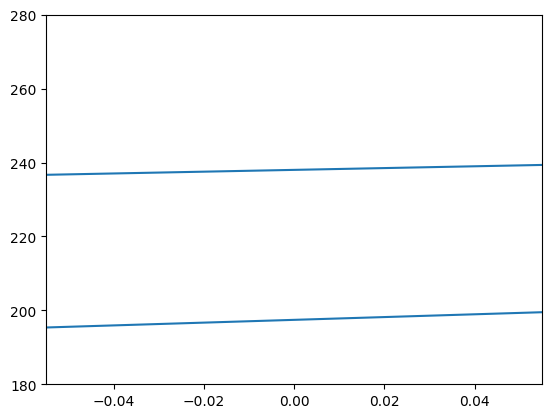

In [28]:
selection_2 = "Cat | " + drop_down.value if dependent_drop_down.value == "" else dependent_drop_down.value
Total_KPIs2 = Total_KPIs.clone()

Total_KPIs2 = Total_KPIs2.filter((pl.col("KPI") == "Rev_per_customer") & (pl.col("Sub_cat") == selection_2))[:,2:].transpose(include_header=True).rename({"column": "YYYYMM","column_0": "Rev_per_customer"})
Total_KPIs2 = Total_KPIs2.with_columns(pl.col("YYYYMM").str.slice(-2).cast(pl.Int64).alias("MM"))
Total_KPIs2 = Total_KPIs2.with_columns(pl.col("YYYYMM").str.slice(0, length=4).cast(pl.Int64).alias("YYYY"))

Total_KPIs2 = Total_KPIs2.filter(pl.col("YYYY") > 2021)
list0 = Total_KPIs2.filter((pl.col("YYYY") == 2023) & (pl.col("MM") < 7))['MM'].to_list()
list1 = Total_KPIs2.filter((pl.col("YYYY") == 2022) & (pl.col("MM") < 7))['Rev_per_customer'].to_list()
list2 = Total_KPIs2.filter((pl.col("YYYY") == 2023) & (pl.col("MM") < 7))['Rev_per_customer'].to_list()

import plotly.graph_objects as go

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
mapped_list = [month_names[number - 1] for number in list0]
months = mapped_list

print("2022")
x = [list0]
y = [list1]
from scipy.stats import linregress
print(linregress(x, y))


print("2023")
x = [list0]
y = [list2]
from scipy.stats import linregress
print(linregress(x, y))

import statsmodels.api as sm

x = list0[3:]
y1 = list1[3:]
y2 = list2[3:]

model1 = sm.OLS(y1, sm.add_constant(x))
model2 = sm.OLS(y2, sm.add_constant(x))
results1 = model1.fit()
results2 = model2.fit()

#print(results.params)
import matplotlib.pyplot as plt

# extract intercept b and slope m
b1, m1 = results1.params
b2, m2 = results2.params

# plot y = m*x + b
plt.axline(xy1=(0, b1), slope=m1, label=f'$y1 = {m1:.1f}x {b1:+.1f}$')
plt.axline(xy1=(0, b2), slope=m2, label=f'$y2 = {m2:.1f}x {b2:+.1f}$')
plt.ylim(180,280)
print(m1)
print(m2)


import statsmodels.api as sm

y = list2[3:]
x = list0[3:]

model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

#print(results.params)
import matplotlib.pyplot as plt

# extract intercept b and slope m
b, m2 = results.params

# plot y = m*x + b
plt.axline(xy1=(0, b), slope=m, label=f'$y = {m:.1f}x {b:+.1f}$')
print(m2)


(m2-m1)/m1